# Superstore Sales Analysis

## Introduction
This project analyzes the Sample Superstore dataset to uncover trends in sales, profit, discounts, and customer behavior. The goal is to create actionable business insights through Python (Pandas & Seaborn) visualizations.


In [7]:
import pandas as pd

df = pd.read_csv("SampleSuperstore.csv", encoding="ISO-8859-1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Dataset Description
- **Rows:** 9,994 transactions
- **Columns:** 21 features including Order ID, Customer, Product, Sales, Profit, Discount, Region, and Segment.
- **Source:** Kaggle Sample Superstore dataset (CSV)
- The dataset includes sales data across multiple categories, sub-categories, and regions.


In [8]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])


Rows: 9994 Columns: 21


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


In [14]:
# Remove spaces in column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
print(df.describe())


            Row_ID   Postal_Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


<Figure size 800x500 with 0 Axes>

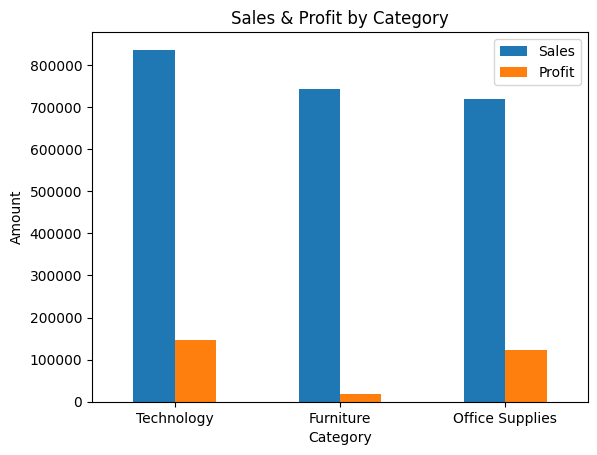

In [31]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for nicer plots

category_summary = df.groupby("Category")[["Sales","Profit"]].sum().sort_values("Sales", ascending=False)

plt.figure(figsize=(8,5))
category_summary[["Sales","Profit"]].plot(kind="bar")
plt.title("Sales & Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


### Sales & Profit by Category
From the bar chart, we observe:
- **Technology** has the highest sales and profit.
- **Furniture** generates decent sales but some sub-categories (like Tables) have low or negative profit.
- **Office Supplies** contribute less to profit but have consistent sales.


C:\Users\user\AppData\Local\Temp\ipykernel_32756\3072811766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette="coolwarm")


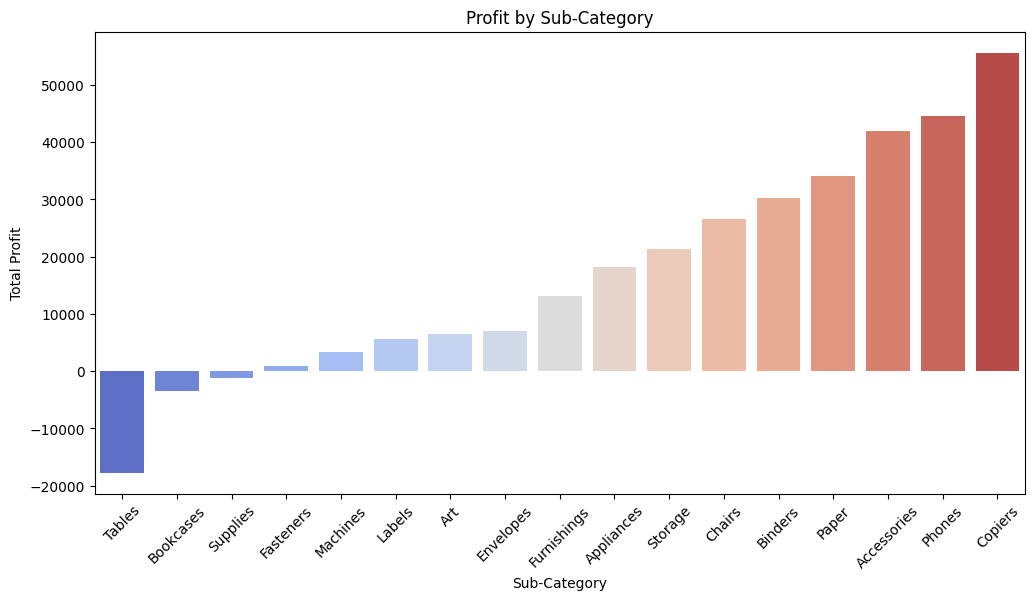

In [19]:
subcat_profit = df.groupby("Sub_Category")["Profit"].sum().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette="coolwarm")
plt.title("Profit by Sub-Category")
plt.ylabel("Total Profit")
plt.xlabel("Sub-Category")
plt.xticks(rotation=45)
plt.show()


### Profit by Sub-Category
- Copiers and Phones are very profitable.
- Tables and Bookcases sometimes generate losses.
- This shows that high sales volume does not always equal high profit.


<Figure size 800x500 with 0 Axes>

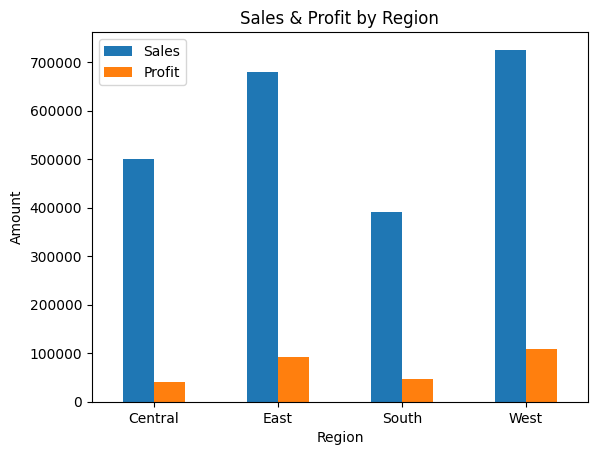

In [20]:
region_summary = df.groupby("Region")[["Sales","Profit"]].sum()

plt.figure(figsize=(8,5))
region_summary[["Sales","Profit"]].plot(kind="bar")
plt.title("Sales & Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


### Sales & Profit by Region
- The **West** region performs best in terms of sales and profit.
- Other regions are moderate, highlighting regional differences in demand.


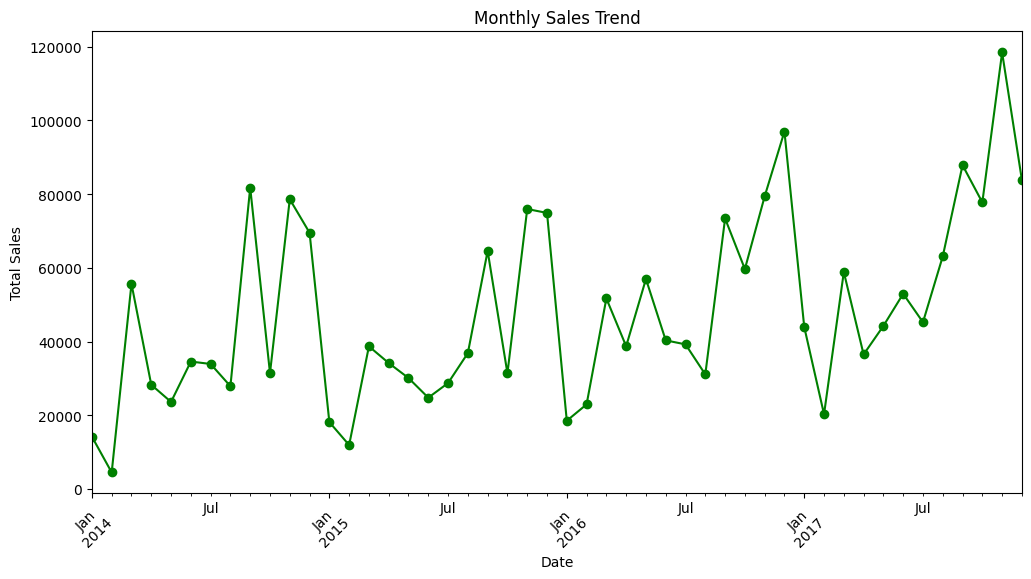

In [21]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["YearMonth"] = df["Order_Date"].dt.to_period("M")

monthly_sales = df.groupby("YearMonth")["Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


### Monthly Sales Trend
- Sales peak around **November–December**, likely due to holiday season.
- Mid-year months have lower sales, indicating seasonality in the business.


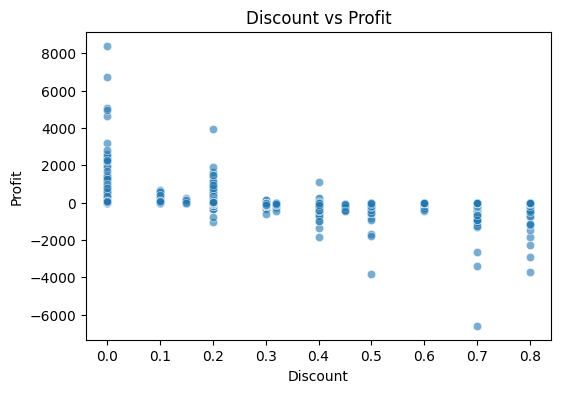

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.6)
plt.title("Discount vs Profit")
plt.show()


### Discount vs Profit
- Higher discounts often reduce profit, shown clearly in the scatter plot.
- Some high-discount orders still generate profit, but generally, discounts should be applied carefully.


<Figure size 800x500 with 0 Axes>

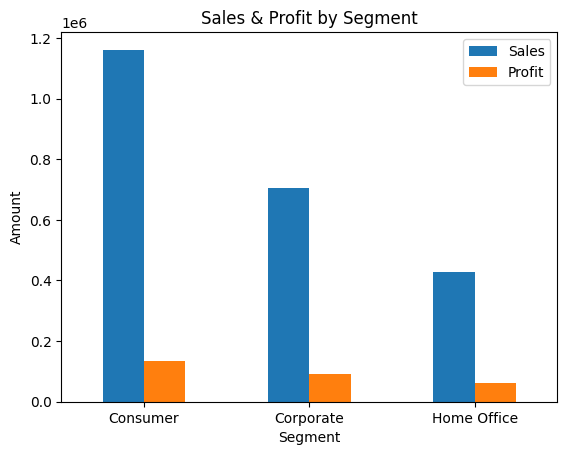

In [23]:
segment_summary = df.groupby("Segment")[["Sales","Profit"]].sum()

plt.figure(figsize=(8,5))
segment_summary[["Sales","Profit"]].plot(kind="bar")
plt.title("Sales & Profit by Segment")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


### Sales & Profit by Customer Segment
- **Corporate and Consumer segments** contribute the most to revenue.
- **Home Office** segment has fewer orders but can still be profitable.


## Conclusion
- **Technology category** is the most profitable and contributes the highest sales.
- **Furniture**, especially Tables, can result in losses despite high sales.
- **West region** is the top-performing region.
- **Sales peak during Nov–Dec**, showing clear seasonal trends.
- **High discounts negatively affect profit**, indicating the need for strategic discounting.
